Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix


grLasso-penalized linear regression with n=189, p=16
At minimum cross-validation error (lambda=0.0060):
-------------------------------------------------
  Nonzero coefficients: 14
  Nonzero groups: 14
  Cross-validation error of 0.43
  Maximum R-squared: 0.19
  Maximum signal-to-noise ratio: 0.24
  Scale estimate (sigma) at lambda.min: 0.653

(Intercept)         age1         age2         age3         lwt1         lwt2 
 3.047819476  0.000000000  1.499598832  0.829503747  1.801948854  0.000000000 
        lwt3        white        black        smoke         ptl1        ptl2m 
 1.292881110  0.287488697 -0.139133726 -0.271060483 -0.289628733  0.184257848 
          ht           ui         ftv1         ftv2        ftv3m 
-0.536316361 -0.462948562  0.074707829  0.003794563 -0.151254128

grLasso-penalized linear regression with n=189, p=16
At minimum cross-validation error (lambda=0.0184):
-------------------------------------------------
  Nonzero coefficients: 16
  Nonzero groups: 8
  Cross-validation error of 0.44
  Maximum R-squared: 0.18
  Maximum signal-to-noise ratio: 0.22
  Scale estimate (sigma) at lambda.min: 0.660

(Intercept)        age1        age2        age3        lwt1        lwt2 
 3.03980161  0.06605057  1.22157782  0.72417976  1.45304814 -0.07667569 
       lwt3       white       black       smoke        ptl1       ptl2m 
 1.07987795  0.25511386 -0.11491470 -0.24778502 -0.25537334  0.15024454 
         ht          ui        ftv1        ftv2       ftv3m 
-0.46412745 -0.44048368  0.05015767  0.01708853 -0.07517179

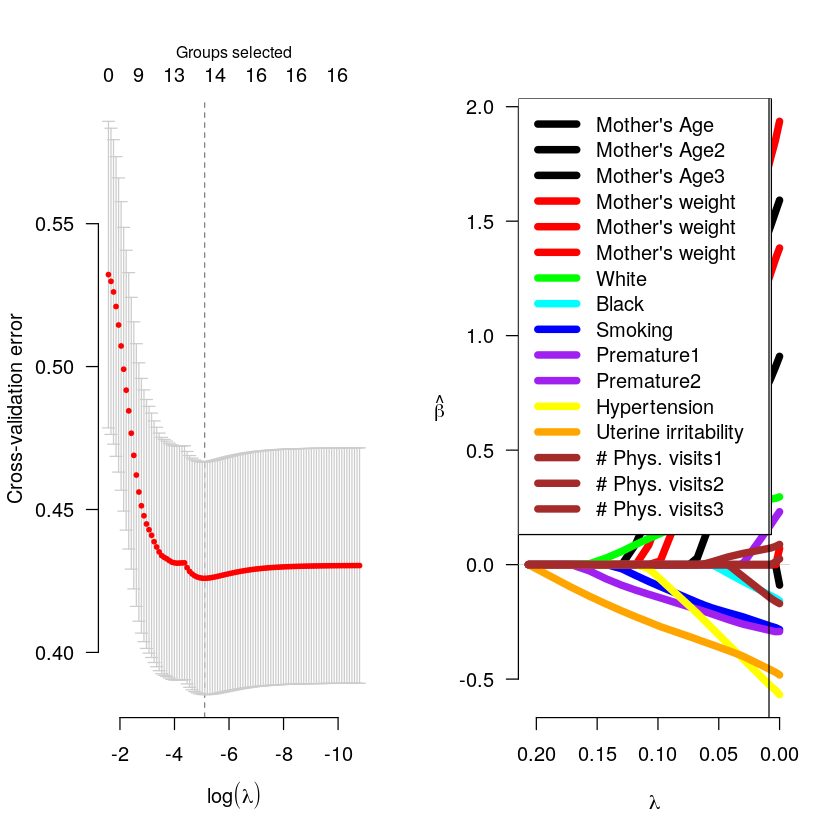

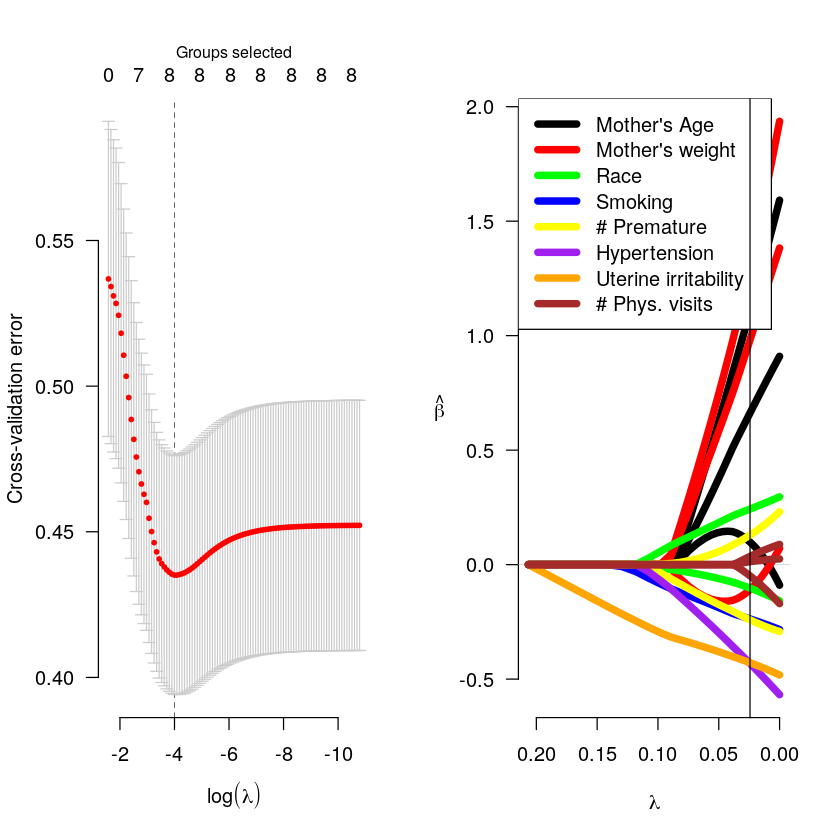

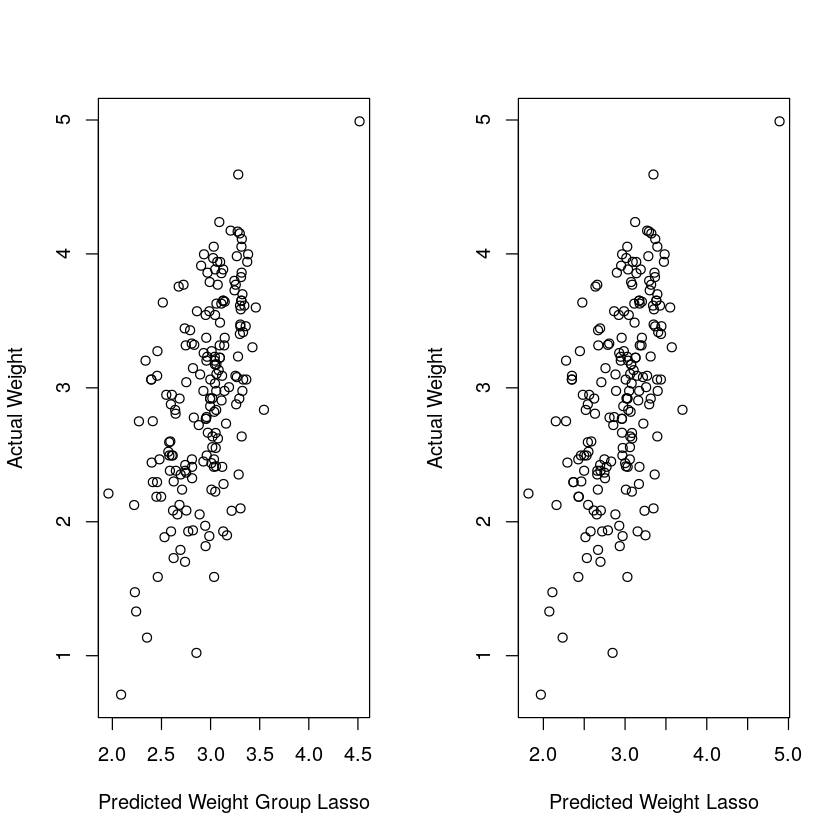

In [1]:
# predicting bodyweight by
# . age1,age2,age3 Orthogonal polynomials of first, second, and third degree representing mother's
# age in years
# . lwt1,lwt2,lwt3 Orthogonal polynomials of first, second, and third degree representing mother's
# weight in pounds at last menstrual period
# . white,black Indicator functions for mother's race; "other" is reference group
# . smoke smoking status during pregnancy
# ptl1, ptl2m,  indicator functions for one or for two previous premature, respectively.
# ht, history of hypertension
# ui, presence of uterine irritability
# ftv1, ftv2, ftv3: indicator functions for one, for 2 or for 3 or more physician visits during the first trimester, respectively. No visits is the reference category

##create data partition
library(caret)
library(grpreg)

data(birthwt.grpreg)
noGroup <- c(1:16)
group <- c(1,1,1,2,2,2,3,3,4,5,5,6,7,8,8,8)

par(mfrow = c(1,2))

X <- as.matrix(birthwt.grpreg[,-1:-2])
y <- birthwt.grpreg$bwt

#######
cvfit <- cv.grpreg(X, y, noGroup)
plot(cvfit)
summary(cvfit)
coef(cvfit) ## Beta at minimum CVE


##makes plot to show change in B by change in lambda with lasso
fit2 <- grpreg(X, y, noGroup, penalty="grLasso")

myColors <- c("black","black","black","red","red", "red", "green","cyan", "blue", "purple", "purple","yellow","orange", "brown","brown","brown")
labs <- c("Mother's Age","Mother's Age2","Mother's Age3", "Mother's weight","Mother's weight","Mother's weight" ,"White","Black", "Smoking","Premature1","Premature2", "Hypertension", "Uterine irritability", "# Phys. visits1","# Phys. visits2","# Phys. visits3")
plot(fit2, legend.loc="topleft", lwd=6, legend=labs, col = myColors)

abline(v = .0087)






#######
cvfit <- cv.grpreg(X, y, group)
plot(cvfit)
summary(cvfit)
coef(cvfit) ## Beta at minimum CVE


##makes plot to show change in B by change in Lambda with Lasso

fit <- grpreg(X, y, group, penalty="grLasso")

myColors <- c("black", "red", "green", "blue", "yellow", "purple",
              "orange", "brown")
labs <- c("Mother's Age", "Mother's weight", "Race", "Smoking",
          "# Premature", "Hypertension", "Uterine irritability", "# Phys. visits")
plot(fit, legend.loc="topleft", lwd=6, alpha=0.5, legend=labs,col=myColors)

abline(v = .0243)


 prediction1 <- predict(fit,X,lambda = .0243)
 prediction2 <- predict(fit2,X,lambda = .0087)
 plot(prediction1,y, xlab = "Predicted Weight Group Lasso", ylab = "Actual Weight")
 plot(prediction2,y, xlab = "Predicted Weight Lasso", ylab = "Actual Weight")